In [32]:
#ICMP Flood attack model
#import packages

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [33]:
#attributes of the dataset and there are total 42 of them in the original dataset.

colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
            "wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised",
            "root_shell","su_attempted","num_root","num_file_creations","num_shells",
            "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count",
            "srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate",
            "srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count",
            "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
            "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
            "dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]

In [34]:
df = pd.read_csv("/home/noroot/Documents/final_year_project/Intrusion_detection_ML/dataset/dataset-corrected.csv",header=None,names=colnames)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311029 entries, 0 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     311029 non-null  int64  
 1   protocol_type                311029 non-null  object 
 2   service                      311029 non-null  object 
 3   flag                         311029 non-null  object 
 4   src_bytes                    311029 non-null  int64  
 5   dst_bytes                    311029 non-null  int64  
 6   land                         311029 non-null  int64  
 7   wrong_fragment               311029 non-null  int64  
 8   urgent                       311029 non-null  int64  
 9   hot                          311029 non-null  int64  
 10  num_failed_logins            311029 non-null  int64  
 11  logged_in                    311029 non-null  int64  
 12  num_compromised              311029 non-null  int64  
 13 

In [36]:
df.shape

(311029, 42)

In [37]:
#extracting the icmp packets from our dataset
icmp_df = df[df.loc[:,"protocol_type"] == "icmp"]

In [38]:
#none of the values in dataset are null
icmp_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [39]:
#sending icmp attack file as csv dataset
icmp_df.to_csv("/home/noroot/Documents/final_year_project/Intrusion_detection_ML/dataset/revised_icmp_dataset.csv")

In [40]:
icmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164969 entries, 82 to 310931
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     164969 non-null  int64  
 1   protocol_type                164969 non-null  object 
 2   service                      164969 non-null  object 
 3   flag                         164969 non-null  object 
 4   src_bytes                    164969 non-null  int64  
 5   dst_bytes                    164969 non-null  int64  
 6   land                         164969 non-null  int64  
 7   wrong_fragment               164969 non-null  int64  
 8   urgent                       164969 non-null  int64  
 9   hot                          164969 non-null  int64  
 10  num_failed_logins            164969 non-null  int64  
 11  logged_in                    164969 non-null  int64  
 12  num_compromised              164969 non-null  int64  
 13

In [41]:
icmp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
82,0,icmp,eco_i,SF,30,0,0,0,0,0,...,3,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.
156,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,75,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
406,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,98,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
629,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,120,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
767,0,icmp,eco_i,SF,30,0,0,0,0,0,...,2,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.


In [42]:
#I will be extracting all the important features as a "priori" for preprocessing
features = ["duration","service","src_bytes","wrong_fragment",
            "count","urgent","num_compromised","srv_count"]
target = "result"

In [43]:
X = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]

In [44]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 164969 entries, 82 to 310931
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   duration         164969 non-null  int64 
 1   service          164969 non-null  object
 2   src_bytes        164969 non-null  int64 
 3   wrong_fragment   164969 non-null  int64 
 4   count            164969 non-null  int64 
 5   urgent           164969 non-null  int64 
 6   num_compromised  164969 non-null  int64 
 7   srv_count        164969 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 11.3+ MB


In [45]:
classes = np.unique(y)
print(classes)

['ipsweep.' 'multihop.' 'normal.' 'pod.' 'saint.' 'satan.' 'smurf.'
 'snmpguess.']


In [46]:
#replacing all classes of attack with 1 and normal result with 0 in our icmp_df
for i in range(len(classes)):
    if i == 2:
        icmp_df = icmp_df.replace(classes[i], 0)
    else:
        icmp_df = icmp_df.replace(classes[i], 1)

#turning the service attribute to categorical values
icmp_df=icmp_df.replace("eco_i",-0.1)
icmp_df=icmp_df.replace("ecr_i",0.0)
icmp_df=icmp_df.replace("tim_i",0.1)
icmp_df=icmp_df.replace("urp_i",0.2)

In [47]:
val = np.unique(icmp_df['service'])
print(val)

[-0.1  0.   0.1  0.2]


In [48]:
y = icmp_df.loc[:,target]

[]

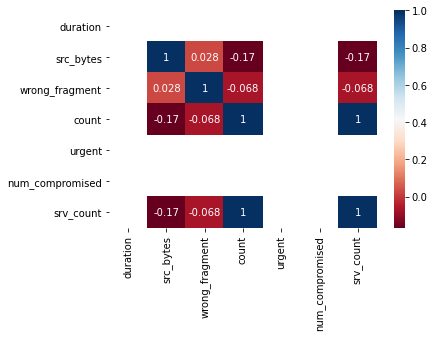

In [49]:
#I selected certain features but I will have to find some covariance between them so I will plot a covariance heatmap
sns.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()
#the data as seen is highly uncorrelated as most of it is one valued such as the duration one.

In [51]:
X = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]
X.head()
X['duration'] = X['duration'].astype('float')
X['src_bytes'] = X['src_bytes'].astype('float')
X['wrong_fragment'] = X['wrong_fragment'].astype('float')
X['count'] = X['count'].astype('float')
X['urgent'] = X['urgent'].astype('float')
X['num_compromised'] = X['num_compromised'].astype('float')
X['srv_count'] = X['srv_count'].astype('float')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164969 entries, 82 to 310931
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   duration         164969 non-null  float64
 1   service          164969 non-null  float64
 2   src_bytes        164969 non-null  float64
 3   wrong_fragment   164969 non-null  float64
 4   count            164969 non-null  float64
 5   urgent           164969 non-null  float64
 6   num_compromised  164969 non-null  float64
 7   srv_count        164969 non-null  float64
dtypes: float64(8)
memory usage: 11.3 MB


In [52]:
print(list(X.loc[629,:])) 

[0.0, 0.0, 30.0, 0.0, 1.0, 0.0, 0.0, 1.0]


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [55]:
#importing sklearn library for machine learning tasks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [58]:
models = [KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
classifiers = ["KNN","ID3"]
scores = []

In [59]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

Accuracy of the model is:  99.99393829181064
Confusion Matrix:
 [[  104     2]
 [    1 49384]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       1.00      0.99      0.99     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============
Accuracy of the model is:  99.99797943060355
Confusion Matrix:
 [[  106     0]
 [    1 49384]]
Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       1.00      1.00      1.00     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============


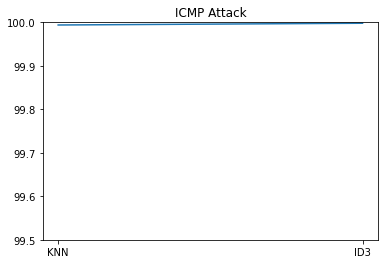

In [60]:
plt.plot(classifiers,scores)
plt.title("ICMP Attack")
plt.ylim(99.5,100)
plt.show()

In [61]:
X.head(10)

,duration,service,src_bytes,wrong_fragment,count,urgent,num_compromised,srv_count
82,0.0,-0.1,30.0,0.0,2.0,0.0,0.0,2.0
156,0.0,0.0,30.0,0.0,2.0,0.0,0.0,2.0
406,0.0,0.0,30.0,0.0,2.0,0.0,0.0,2.0
629,0.0,0.0,30.0,0.0,1.0,0.0,0.0,1.0
767,0.0,-0.1,30.0,0.0,3.0,0.0,0.0,1.0
813,0.0,0.0,1032.0,0.0,508.0,0.0,0.0,508.0
814,0.0,0.0,1032.0,0.0,509.0,0.0,0.0,509.0
815,0.0,0.0,1032.0,0.0,510.0,0.0,0.0,510.0
816,0.0,0.0,1032.0,0.0,510.0,0.0,0.0,510.0
817,0.0,0.0,1032.0,0.0,511.0,0.0,0.0,511.0


In [31]:
y.head(10)

82     0
156    0
406    0
629    0
767    0
813    1
814    1
815    1
816    1
817    1
Name: result, dtype: int64

In [33]:
print(list(X.loc[813,:])) 

[0.0, 0.0, 1032.0, 0.0, 508.0, 0.0, 0.0, 508.0]
